In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_blobs, make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

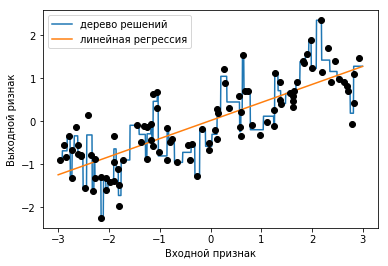

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="дерево решений")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="линейная регрессия")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Входной признак')
plt.ylabel("Выходной ризнак")
plt.legend(loc='best')

In [3]:
bins= np.linspace(-3, 3, 11)
print ('категории: {}'.format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
# записать в какую категорию попадает каждая точка
which_bin = np.digitize(X, bins=bins)
print ('\nТочки данных:\n', X[:5])
print ('\nКатегории для точек данных:\n', which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [5]:
from sklearn.preprocessing import OneHotEncoder
#Преобразвоание с помощью OneHot
encoder = OneHotEncoder(sparse=False)
# encode.fit находит уникальные значения имеющихся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print (X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


Text(0.5,0,'Входной признак')

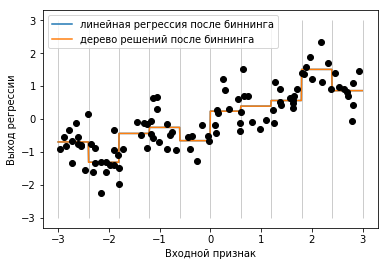

In [7]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='линейная регрессия после биннинга')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

# Взаимодействие и полиномы (page 241)

In [9]:
X_combinned = np.hstack([X, X_binned])
print (X_combinned.shape)

(100, 11)


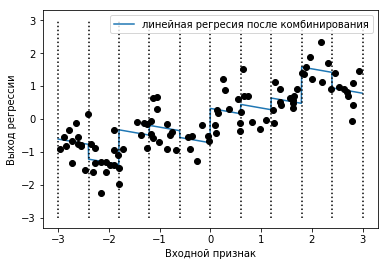

In [12]:
req = LinearRegression().fit(X_combinned, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, req.predict(line_combined), label = 'линейная регресия после комбинирования')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k')

plt.legend(loc='best')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.plot(X[:, 0], y, 'o', c='k')

In [16]:
X_product = np.hstack([X_binned, X * X_binned])
print (X_product.shape)

(100, 20)


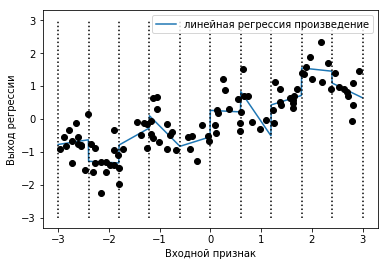

In [17]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='линейная регрессия произведение')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# задаем степень полинома 10:
# значение по умолчанию "include_bias=True" добавляет признак-константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [19]:
print ('форма массива Х: {}'.format(X_poly.shape))

форма массива Х: (100, 10)


In [23]:
print("Элементы массива X:\n{}".format(X[:5]))
print("Элементы массива X_poly:\n{}".format(X_poly[:5]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Элементы массива X_poly:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670

In [24]:
print("Имена полиномиальных признаков:\n{}".format(poly.get_feature_names()))

Имена полиномиальных признаков:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


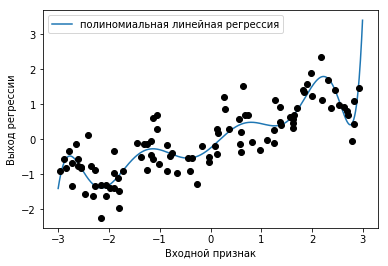

In [25]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

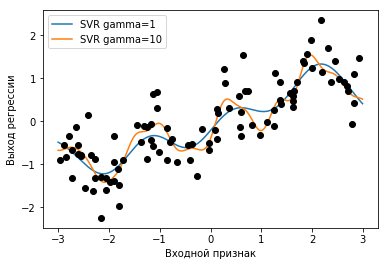

In [27]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")